In [3]:
import pickle
from gcdyn.models import NeuralNetworkModel
from gcdyn.poisson import ConstantResponse
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

## Train-test split

In [2]:
with open("merged-simu.pkl", "rb") as f:
    samples = pickle.load(f)

In [12]:
N = len(samples["trees"])

sublist = lambda x, idx: [x[i] for i in idx]

train_idx = random.sample(range(N), int(0.8 * N))
test_idx = [i for i in range(N) if i not in train_idx]

train_samples = {key: sublist(val, train_idx) for key, val in samples.items()}
test_samples = {key: sublist(val, test_idx) for key, val in samples.items()}

## Train model

In [13]:
param_to_predict = [
    [ConstantResponse(row[0].xscale)] for row in train_samples["responses"]
]

model = NeuralNetworkModel(train_samples["trees"], param_to_predict)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [14]:
model.fit(epochs=100)

Epoch 1/100


2023-05-02 15:12:16.953067: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 2s 69ms/step - loss: 2.5102
Epoch 2/100
16/16 [==============================] - 1s 32ms/step - loss: 0.0587
Epoch 3/100
16/16 [==============================] - 1s 31ms/step - loss: 0.0712
Epoch 4/100
16/16 [==============================] - 1s 31ms/step - loss: 0.1062
Epoch 5/100
16/16 [==============================] - 1s 34ms/step - loss: 0.0385
Epoch 6/100
16/16 [==============================] - 1s 37ms/step - loss: 0.0479
Epoch 7/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0710
Epoch 8/100
16/16 [==============================] - 1s 33ms/step - loss: 0.0475
Epoch 9/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0566
Epoch 10/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0463
Epoch 11/100
16/16 [==============================] - 0s 31ms/step - loss: 0.0468
Epoch 12/100
16/16 [==============================] - 1s 34ms/step - loss: 0.0465
Epoch 13/100
16/16 [=================

## Distribution of predictions on train set

In [24]:
result = model.predict(train_samples["trees"], ladderize_trees=False)

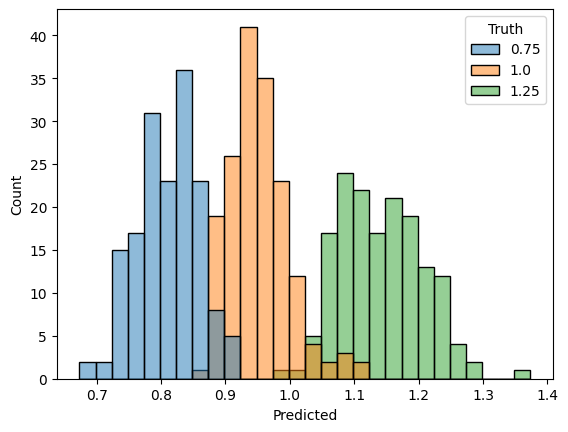

In [25]:
df = pd.DataFrame(
    {
        "Predicted": np.array([row[0].value for row in result]),
        "Truth": np.array(
            [row[0].xscale for row in train_samples["responses"]], dtype=str
        ),
    }
)

sns.histplot(df, x="Predicted", hue="Truth", binwidth=0.025)
plt.show()

## Distribution of predictions on test set

In [15]:
result = model.predict(test_samples["trees"])

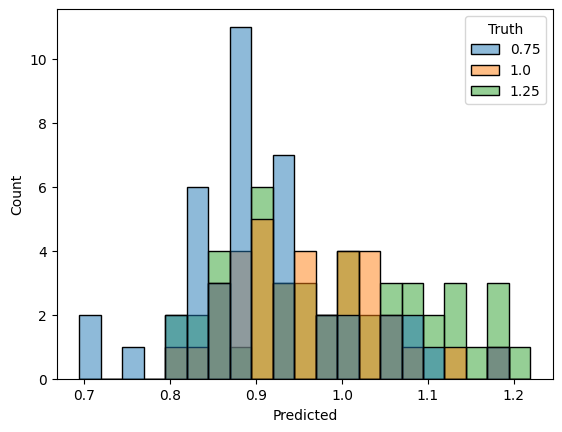

In [18]:
df = pd.DataFrame(
    {
        "Predicted": np.array([row[0].value for row in result]),
        "Truth": np.array(
            [row[0].xscale for row in test_samples["responses"]], dtype=str
        ),
    }
)

sns.histplot(df, x="Predicted", hue="Truth", binwidth=0.025)
plt.show()